In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [35]:
# Load the dataset
dataset = pd.read_csv("dataset/spambase.csv")
# Show the first 10 rows of the dataset
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


# 1. More frequent words in SPAM and NO SPAM emails

To get the most common words in spam emails.

In [6]:
# Agrupate by spam and sum the values
column_sum = dataset.groupby('spam', as_index=False).sum()
# Select only the columns that represent the frequency of words
word_columns = [col for col in dataset.columns if col.startswith('word_freq_')]
# Extract the frequencies of words in spam emails
spam_word_frequencies = column_sum.loc[1, word_columns]
# Order the frequencies from highest to lowest
most_used_words_in_spam = spam_word_frequencies.sort_values(ascending=False)
# Get the top 10 most used words in spam emails
top_10_spam_words = most_used_words_in_spam.head(10)
# Remove 'word_freq_' from the column names
top_10_spam_words.index = top_10_spam_words.index.str.replace('word_freq_', '')
top_10_spam_words

you         4105599
your        2502597
will         997100
free         939790
our          931799
all          732080
mail         635470
email        578759
business     521250
remove       499309
Name: 1, dtype: int64

To get the most common words in non-spam emails.

In [7]:
# Extract the frequencies of words in non-spam emails
non_spam_word_frequencies = column_sum.loc[0, word_columns]
# Order the frequencies from highest to lowest
most_used_words_in_non_spam = non_spam_word_frequencies.sort_values(ascending=False)
# Get the top 10 most used words in non-spam emails
top_10_non_spam_words = most_used_words_in_non_spam.head(10)
# Remove 'word_freq_' from the column names
top_10_non_spam_words.index = top_10_non_spam_words.index.str.replace('word_freq_', '')
top_10_non_spam_words

you        3541702
george     3527559
hp         2496576
will       1495268
your       1223098
hpl        1204398
re         1159138
edu         800669
address     681569
meeting     604460
Name: 0, dtype: int64

# 2. Dataset split into train and test subsets

In [8]:
# Create the X characteristics matrix by dropping the 'spam' column
X = dataset.drop('spam', axis=1)
# Create the y target vector by selecting only the 'spam' column
y = dataset['spam']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
# Print the number of samples in each set
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 3220 samples.
Testing set has 1381 samples.


# 3. Naive Bayes Classifier

In [15]:
# Create the Naive Bayes classifier
clf = MultinomialNB()
# Train the classifier
clf.fit(X_train, y_train)

MultinomialNB()

In [19]:
# Calculate the accuracy of the classifier with the training set
acc_train = accuracy_score(y_train, clf.predict(X_train))
# Calculate the accuracy of the classifier with the testing set
acc_test = accuracy_score(y_test, clf.predict(X_test))
# Print the accuracy metrics
print(f"Training accuracy: {acc_train}")
print(f"Test accuracy: {acc_test}")

Training accuracy: 0.8633540372670807
Test accuracy: 0.8732802317161478


# 4. Logistic Regression Classifier

In [24]:
# Define the scaler
scaler = MinMaxScaler()
# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing set
X_test_scaled = scaler.transform(X_test)
# For better visualization, convert the scaled NumPy arrays to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

Visualize the normalized training data.

In [25]:
X_train_scaled

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.000000,0.000000,0.219608,0.0,0.061606,0.000000,0.000000,0.000000,0.000000,0.074172,...,0.0280,0.0,0.0,0.0,0.000000,0.010357,0.000000,0.018659,0.000000,0.000000
1,0.070485,0.000000,0.125490,0.0,0.035204,0.054422,0.000000,0.344017,0.060837,0.084768,...,0.0000,0.0,0.0,0.0,0.000000,0.016407,0.000000,0.036271,0.017824,0.000000
2,0.000000,0.000000,0.000000,0.0,0.037404,0.000000,0.000000,0.072650,0.000000,0.225166,...,0.0000,0.0,0.0,0.0,0.000000,0.005640,0.026954,0.000000,0.000000,0.000000
3,0.041850,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.006157,0.011075,0.000000,0.000000,0.017991,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.000000,0.076497,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0.000000,0.000000,0.784314,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.018874,0.000000,0.000000
3216,0.000000,0.000000,0.000000,0.0,0.457646,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.000000,0.070652,0.000000,0.021214,0.000000,0.000000
3217,0.000000,0.000000,0.000000,0.0,0.122112,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.024139,0.000000,0.000000
3218,0.000000,0.039916,0.111765,0.0,0.125413,0.096939,0.313618,0.000000,0.000000,0.075497,...,0.0285,0.0,0.0,0.0,0.000000,0.008306,0.000000,0.014995,0.000000,0.004085


Visualize the normalized test data

In [26]:
X_test_scaled

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.1515,0.181437,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.027989
2,0.000000,0.000000,0.000000,0.000000,0.058306,0.000000,0.000000,0.055556,0.000000,0.000000,...,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.017088,0.000000,0.058349
3,0.019824,0.013305,0.192157,0.000000,0.085809,0.132653,0.067400,0.000000,0.148289,0.025166,...,0.0045,0.005389,0.0,0.0,0.000000,0.010459,0.000000,0.012100,0.024155,0.000706
4,0.000000,0.029412,0.082353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0,0.0,0.000000,0.007691,0.000000,0.018474,0.049975,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143054,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0,0.0,0.014139,0.025431,0.000000,0.019121,0.010328,0.003127
1377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0615,0.110778,0.0,0.0,0.000000,0.010049,0.000000,0.003017,0.000000,0.000000
1378,0.011013,0.000000,0.009804,0.000000,0.033003,0.000000,0.000000,0.000000,0.096958,0.000000,...,0.0000,0.000000,0.0,0.0,0.047662,0.016202,0.012252,0.000000,0.002332,0.000000
1379,0.140969,0.000000,0.049020,0.000000,0.000000,0.064626,0.000000,0.000000,0.000000,0.033113,...,0.0060,0.000000,0.0,0.0,0.000000,0.016509,0.000000,0.033315,0.049808,0.004640


In [28]:
# Create the Logistic Regression classifier
logistic_clf = LogisticRegression()
# Fit the classifier
logistic_clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
# Calculate the accuracy of the classifier with the training set
acc_train = accuracy_score(y_train, logistic_clf.predict(X_train))
# Calculate the accuracy of the classifier with the testing set
acc_test = accuracy_score(y_test, logistic_clf.predict(X_test))
# Print the accuracy metrics
print(f"Training accuracy: {acc_train}")
print(f"Test accuracy: {acc_test}")

Training accuracy: 0.8071428571428572
Test accuracy: 0.8066618392469225


# 5. Confusion Matrixes 

### Naive Bayes Classifier

In [50]:
# Get the test set predictions
y_pred = clf.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: \n{conf_matrix}")

Confusion matrix: 
[[683 154]
 [ 21 523]]


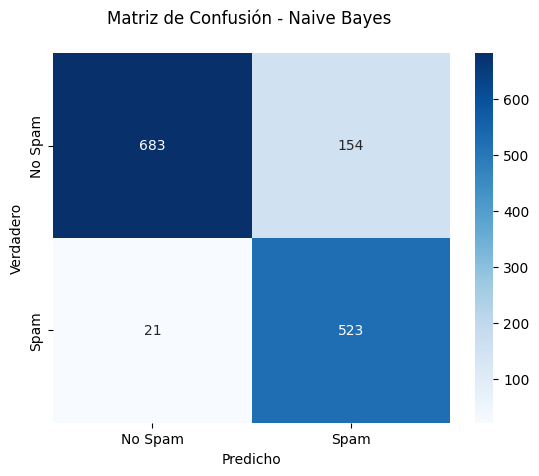

In [51]:
# Create a figure and an axis
fig, ax = plt.subplots()
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
# Configure the axis labels
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión - Naive Bayes \n')
# Configure the tick labels
ax.xaxis.set_ticklabels(['No Spam', 'Spam'])
ax.yaxis.set_ticklabels(['No Spam', 'Spam'])
# Save the plot
plt.savefig('images/naive_bayes_confusion_matrix.png')

plt.show()

### Logistic Regression Classifier

In [52]:
# Get the test set predictions
y_pred = logistic_clf.predict(X_test_scaled)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: \n{conf_matrix}")

Confusion matrix: 
[[785  52]
 [112 432]]


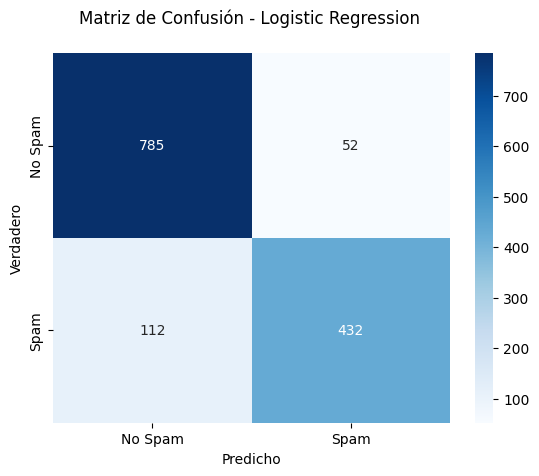

In [53]:
# Create a figure and an axis
fig, ax = plt.subplots()
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
# Configure the axis labels
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión - Logistic Regression \n')
# Configure the tick labels
ax.xaxis.set_ticklabels(['No Spam', 'Spam'])
ax.yaxis.set_ticklabels(['No Spam', 'Spam'])
# Save the plot
plt.savefig('images/logistic_regression_confusion_matrix.png')

plt.show()